In [1]:
from __future__ import annotations

# from carps.analysis.process_data import get_interpolated_performance_df, load_logs, process_logs
import importlib
from pathlib import Path

import carps
import carps.analysis
import carps.analysis.gather_data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

importlib.reload(carps)
importlib.reload(carps.analysis.gather_data)
from carps.analysis.gather_data import get_interpolated_performance_df, load_set, normalize_logs


def print_overview(df_trials: pd.DataFrame) -> None:
    print(df_trials.columns)
    print(df_trials["optimizer_id"].unique())
    print(df_trials["benchmark_id"].unique())
    print(df_trials["problem_id"].unique())
    print(df_trials["scenario"].unique())
    print("Number of seeds", df_trials["seed"].nunique())


# rundir = "../runs"
# df, df_cfg = load_logs(rundir=rundir)
# df = pd.read_csv("../logs_combined.csv")
# df_cfg = pd.read_csv("../logs_combined_cfg.csv")

paths = {
    "BBfull": {
        "full": [
        "../runs/SMAC3-BlackBoxFacade",
        "../runs/RandomSearch",
        "../runs/Nevergrad-CMA-ES",
    ]},
    "MOfull": {
        "full": ["../runs_MO"]
    },
    "BBsubset": {
        "dev": ["../runs_subset_BB/dev"],
        "test": ["../runs_subset_BB/test"],
    },
    "MFsubset": {
        "dev": ["../runs_subset_MF/dev"],
        "test": ["../runs_subset_MF/test"],
    },
    "MOsubset": {
        "dev": ["../runs_subset_MO/dev"],
        "test": ["../runs_subset_MO/test"],
    },
    "MOMFsubset": {
        "dev": ["../runs_subset_MOMF/dev"],
        "test": ["../runs_subset_MOMF/test"],
    },
}
subset = "BBsubset"
problem_prefix = "blackbox/20"

# subset = "MFsubset"
# problem_prefix = "multifidelity/20"

# subset = "MOsubset"
# problem_prefix = "multiobjective/10"

# subset = "MOMFsubset"
# problem_prefix = "momf/9"



loaded = [load_set(paths=ps, set_id=set_id) for set_id, ps in paths[subset].items()]
df = pd.concat([d for d, _ in loaded]).reset_index(drop=True)
df_cfg = pd.concat([d for _, d in loaded]).reset_index(drop=True)


print(df.columns)
df = normalize_logs(df)
print_overview(df)
perf = get_interpolated_performance_df(df)
perf_time = get_interpolated_performance_df(df, x_column="time_norm")

Index(['problem_id', 'optimizer_id', 'seed', 'level_3', 'n_trials',
       'n_function_calls', 'trial_info__config', 'trial_info__instance',
       'trial_info__seed', 'trial_info__budget',
       'trial_info__normalized_budget', 'trial_info__name',
       'trial_info__checkpoint', 'trial_value__cost', 'trial_value__time',
       'trial_value__virtual_time', 'trial_value__status',
       'trial_value__starttime', 'trial_value__endtime', 'benchmark_id',
       'problem.problem.rng', 'problem.seed', 'trial_value__cost_raw',
       'trial_value__cost_inc', 'scenario', 'time', 'problem.model',
       'problem.task_id', 'problem.budget_type', 'problem.bench',
       'problem.instance', 'problem.metric', 'problem.dimension',
       'problem.fid', 'experiment_id', 'set'],
      dtype='object')


[09:36:33] INFO     Start normalization...                                                       ]8;id=751028;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=404911;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#370\370]8;;\

           INFO     Normalize n_trials...                                                        ]8;id=615368;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=346441;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#371\371]8;;\

           INFO     Normalize cost...                                                            ]8;id=243844;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=820171;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#373\373]8;;\

           INFO     Calc normalized incumbent cost...                                            ]8;id=841026;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=236003;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#382\382]8;;\

[09:36:34] INFO     Normalize time...                                                            ]8;id=595656;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=309704;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#402\402]8;;\

[09:36:36] INFO     Done.                                                                        ]8;id=244871;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=420137;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#405\405]8;;\

Index(['problem_id', 'optimizer_id', 'seed', 'level_3', 'n_trials',
       'n_function_calls', 'trial_info__config', 'trial_info__instance',
       'trial_info__seed', 'trial_info__budget',
       'trial_info__normalized_budget', 'trial_info__name',
       'trial_info__checkpoint', 'trial_value__cost', 'trial_value__time',
       'trial_value__virtual_time', 'trial_value__status',
       'trial_value__starttime', 'trial_value__endtime', 'benchmark_id',
       'problem.problem.rng', 'problem.seed', 'trial_value__cost_raw',
       'trial_value__cost_inc', 'scenario', 'time', 'problem.model',
       'problem.task_id', 'problem.budget_type', 'problem.bench',
       'problem.instance', 'problem.metric', 'problem.dimension',
       'problem.fid', 'experiment_id', 'set', 'n_trials_norm',
       'trial_value__cost_norm', 'trial_value__cost_log',
       'trial_value__cost_inc_log', 'trial_value__cost_log_norm',
       'trial_value__cost_inc_log_norm', 'trial_value__cost_inc_norm',
       'trial

           INFO     Create dataframe for neat plotting by aligning x-axis / interpolating        ]8;id=933805;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=299379;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#462\462]8;;\
                    budget.                                                                                        

[09:36:41] INFO     Create dataframe for neat plotting by aligning x-axis / interpolating        ]8;id=239188;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=708667;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#462\462]8;;\
                    budget.                                                                                        

In [78]:
df.to_csv("../results.csv", index=False)

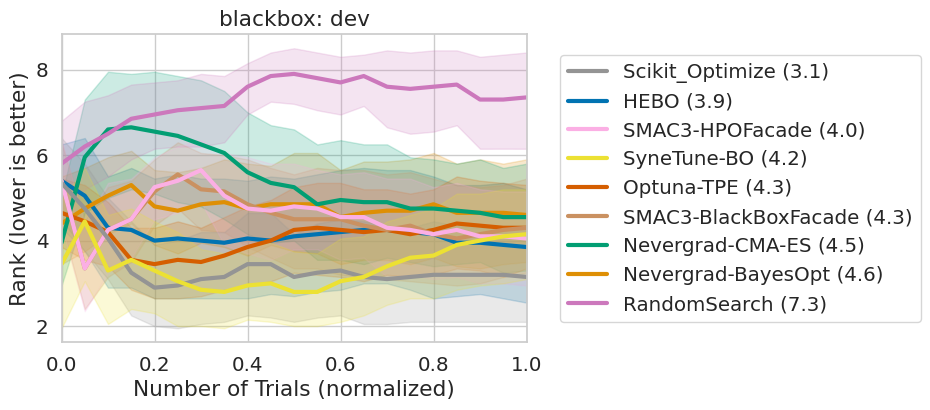

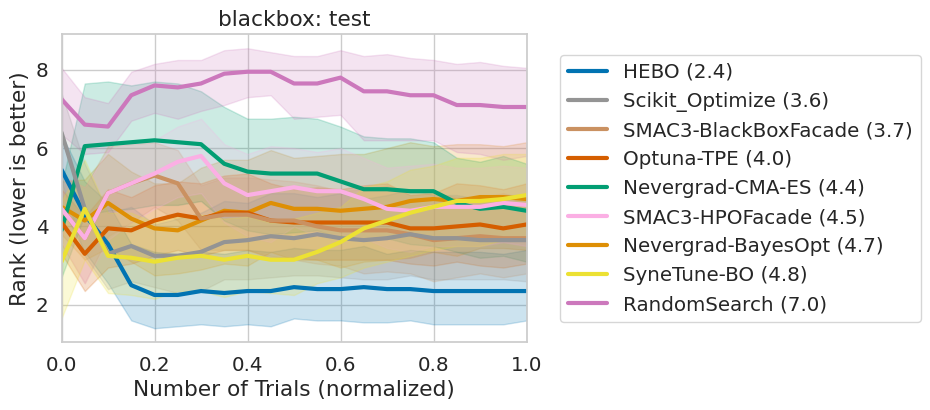

In [31]:
# Plot per problem (raw values)
import seaborn as sns
from carps.analysis.utils import get_color_palette, savefig, setup_seaborn

setup_seaborn(font_scale=1.3)
palette = get_color_palette(perf)
lineplot_kwargs = {"linewidth": 3}

key_performance = "trial_value__cost_inc"
x_column = "n_trials_norm"
source_df = perf.copy()

# Calculate the rank of each optimizer for each problem. The estimated performance is
# the mean of all seeds. We use the interpolated performance, otherwise it is not
# possible to plot well with seaborn (seaborn needs a value for each x value).
group_keys_estimate = ["scenario", "set", "benchmark_id", "problem_id", "optimizer_id", x_column]
df_estimated = source_df.groupby(group_keys_estimate)[key_performance].mean().reset_index()
df_rank = df_estimated.copy()
df_rank["rank"] = df_estimated.groupby(["scenario", "set", "benchmark_id", "problem_id", x_column])[key_performance].rank(ascending=True, method="min")
csv_filename = Path(f"data/rank_{subset}.csv")
csv_filename.parent.mkdir(parents=True, exist_ok=True)
df_rank.to_csv(csv_filename, index=False)

for gid, gdf in df_rank.groupby(["scenario", "set"]):
    final_rank = gdf[gdf[x_column] == df_rank[x_column].max()].groupby("optimizer_id")["rank"].mean().sort_values()
    fig, ax = plt.subplots(figsize=(6, 4))
    ax = sns.lineplot(data=gdf, x=x_column, y="rank", hue="optimizer_id", ax=ax, palette=palette, **lineplot_kwargs)
    ax.set_xlabel("Number of Trials (normalized)")
    ax.set_ylabel("Rank (lower is better)")
    ax.set_xlim(0, 1)
    handles, labels = ax.get_legend_handles_labels()
    sorted_handles_labels = sorted(zip(handles, labels, strict=False), key=lambda x: final_rank[x[1]])
    sorted_handles, sorted_labels = zip(*sorted_handles_labels, strict=False)
    sorted_labels = [f"{l} ({final_rank[l]:.1f})" for l in sorted_labels]
    ax.legend(sorted_handles, sorted_labels, loc="center left", bbox_to_anchor=(1.05, 0.5))
    # ax.legend(loc="center left", bbox_to_anchor=(1.05, 0.5))
    ax.set_title(f"{gid[0]}: {gid[1]}")
    figure_filename = f"figures/rank_{subset}_{gid[0]}_{gid[1]}"
    savefig(fig, figure_filename)
    plt.show()

/tmp/ipykernel_2279595/3337013972.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_auc = source_df.groupby(["scenario", "set", "benchmark_id", "problem_id", "optimizer_id", "seed"]).apply(calculate_auc)


('blackbox', 'dev')


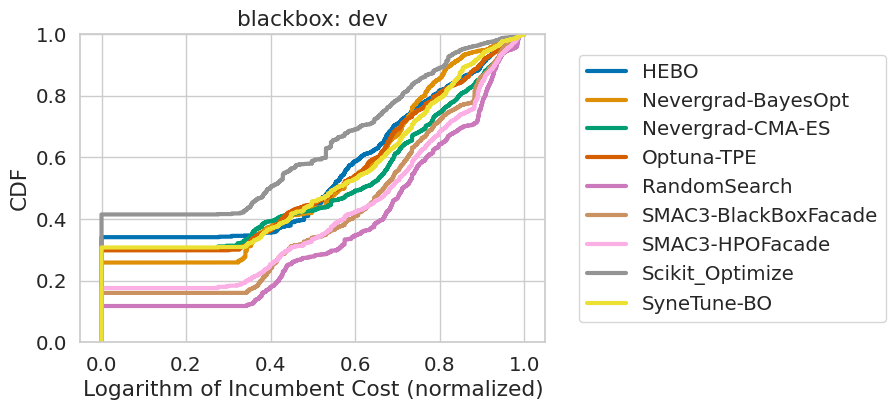

('blackbox', 'test')


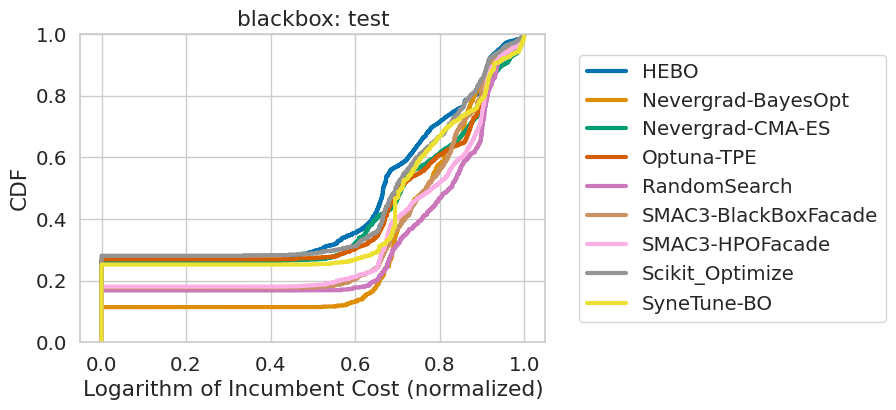

In [77]:
# Calculate AUC for each optimizer per problem
import seaborn as sns
from carps.analysis.utils import get_color_palette, savefig, setup_seaborn

setup_seaborn(font_scale=1.3)
palette = get_color_palette(perf)
lineplot_kwargs = {"linewidth": 3}

key_performance = "trial_value__cost_inc_log_norm"
x_column = "n_trials_norm"
source_df = df.copy()

def calculate_auc(x: pd.DataFrame) -> float:
    return np.trapezoid(x[key_performance], x[x_column])

df_auc = source_df.groupby(["scenario", "set", "benchmark_id", "problem_id", "optimizer_id", "seed"]).apply(calculate_auc)
df_auc.name = "auc"
df_auc = df_auc.reset_index()

for gid, gdf in source_df.groupby(["scenario", "set"]):
    print(gid)

    fig, ax = plt.subplots(figsize=(6, 4))

    for optimizer_id, odf in gdf.groupby("optimizer_id"):
        ax = sns.ecdfplot(data=odf, x="trial_value__cost_inc_log_norm", ax=ax, label=optimizer_id, color=palette[optimizer_id], **lineplot_kwargs)
    ax.legend(loc="center left", bbox_to_anchor=(1.05, 0.5))
    # ax.set_xscale("log")
    ax.set_xlabel("Logarithm of Incumbent Cost (normalized)")
    ax.set_ylabel("CDF")
    ax.set_title(f"{gid[0]}: {gid[1]}")
    figure_filename = f"figures/auc_{subset}_{gid[0]}_{gid[1]}"
    savefig(fig, figure_filename)
    plt.show()


In [ ]:
import seaborn as sns
from carps.analysis.utils import filter_only_final_performance

sns.set_style("whitegrid")
sns.set_palette("colorblind")
df_final = filter_only_final_performance(df=df)

# Normalize by random search performance
baseline = "RandomSearch"
key_performance = "trial_value__cost_inc"
group_keys = ["problem_id", "seed"]
key_performance_new = "normalized_cost_inc"
def normalize_by_baseline(x: pd.DataFrame, mean_value: float | None = None) -> pd.Series:
    if mean_value is None:
        baseline_performance = x[x["optimizer_id"] == baseline][key_performance].values[0]
    else:
        baseline_performance = mean_value
    return (x[key_performance] - baseline_performance) / baseline_performance

new_df = []
mean_values = df_final[df_final["optimizer_id"] == baseline].groupby("problem_id")[key_performance].mean().to_dict()
for gid, gdf in df_final.groupby(group_keys):
    mean_value = None
    # mean_value = mean_values.get(gid[0], None)
    gdf[key_performance_new] = normalize_by_baseline(gdf, mean_value)
    new_df.append(gdf)
df_final = pd.concat(new_df).reset_index(drop=True)

n_optimizers = df_final["optimizer_id"].nunique()

for gid, gdf in df_final.groupby(["problem_id"]):
    try:
        problem_id = gid[0]
        ax = sns.boxplot(data=gdf, y="optimizer_id", x=key_performance_new)
        ax.vlines(0, 0 - 0.5, n_optimizers - 0.5, colors="black")
        plt.title(problem_id)
        plt.show()
    except Exception as e:
        print(e)
        print(gid)


In [ ]:
import seaborn as sns


def calculate_auc(df: pd.DataFrame, x_column: str = "n_trials_norm", perf_column: str = "trial_value__cost_inc_norm") -> pd.DataFrame:
    df = df.copy()
    df["delta_x"] = df[x_column].diff()
    df["delta_y"] = df[perf_column].diff()
    auc = df["delta_x"] * df[perf_column]
    return auc.cumsum()

for gid, gdf in perf.groupby(by=["problem_id", "optimizer_id", "seed"]):
    # print(gid)
    # gdf["auc"]
    # print(gdf)
    # print(calculate_auc(gdf))
    # print(np.log(gdf["trial_value__cost_inc_norm"]))
    break

sns.set_style("whitegrid")

result_variants = [
    "trial_value__cost_inc",
    "trial_value__cost_inc_norm",
    "trial_value__cost_inc_norm_log",
    "trial_value__cost_inc_log",
    "trial_value__cost_inc_log_norm",
]


for gid, gdf in df.groupby("problem_id"):
    print(gid, gdf["trial_value__cost_inc"].min(), gdf["trial_value__cost_inc"].max())
    if "yahpo" in gid:
        for result_variant in result_variants:
            ax = sns.histplot(gdf[result_variant], bins=100)
            ax.set_title(f"{gid}: {result_variant}")
            plt.show()
        break
    else:
        continue


In [ ]:
# Calculate time
from carps.analysis.utils import filter_only_final_performance

df_final = filter_only_final_performance(df=df)
print("Runtime", subset, df_final["time"].sum() / 60 / 60)

----------------------------------------------------------------------------------------------------
('blackbox', 'dev')


[16:06:53] INFO     Lost following experiments: Empty DataFrame                                 ]8;id=830230;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py\run_autorank.py]8;;\:]8;id=794479;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py#113\113]8;;\
                    Columns: [HEBO, Nevergrad-BayesOpt, Nevergrad-CMA-ES, Optuna-TPE,                              
                    RandomSearch, SMAC3-BlackBoxFacade, SMAC3-HPOFacade, Scikit_Optimize,                          
                    SyneTune-BO]                                                                                   
                    Index: []                                                                                      

Fail to reject null hypothesis that data is normal for column HEBO (p=0.023087>=0.005556)
Fail to reject null hypothesis that data is normal for column Nevergrad-BayesOpt (p=0.108918>=0.005556)
Fail to reject null hypothesis that data is normal for column Nevergrad-CMA-ES (p=0.057418>=0.005556)
Fail to reject null hypothesis that data is normal for column Optuna-TPE (p=0.056695>=0.005556)
Fail to reject null hypothesis that data is normal for column RandomSearch (p=0.139675>=0.005556)
Fail to reject null hypothesis that data is normal for column SMAC3-BlackBoxFacade (p=0.478557>=0.005556)
Fail to reject null hypothesis that data is normal for column SMAC3-HPOFacade (p=0.329304>=0.005556)
Fail to reject null hypothesis that data is normal for column Scikit_Optimize (p=0.007740>=0.005556)
Fail to reject null hypothesis that data is normal for column SyneTune-BO (p=0.022159>=0.005556)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the dis

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:235: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [(rankpos(sorted_ranks[i]), cline), (rankpos(sorted_ranks[i]), chei), (textspace - 0.1, chei)],
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:243: FutureWarning: Series.__getitem__ treating ke

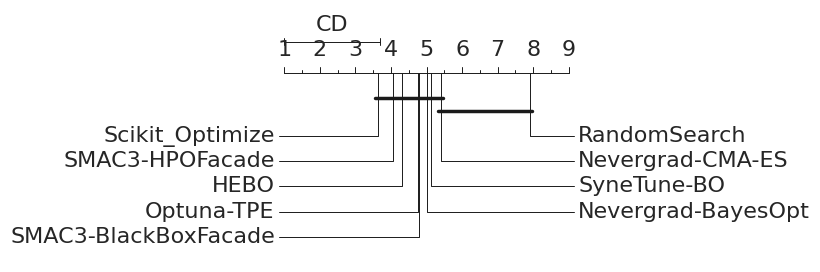

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:


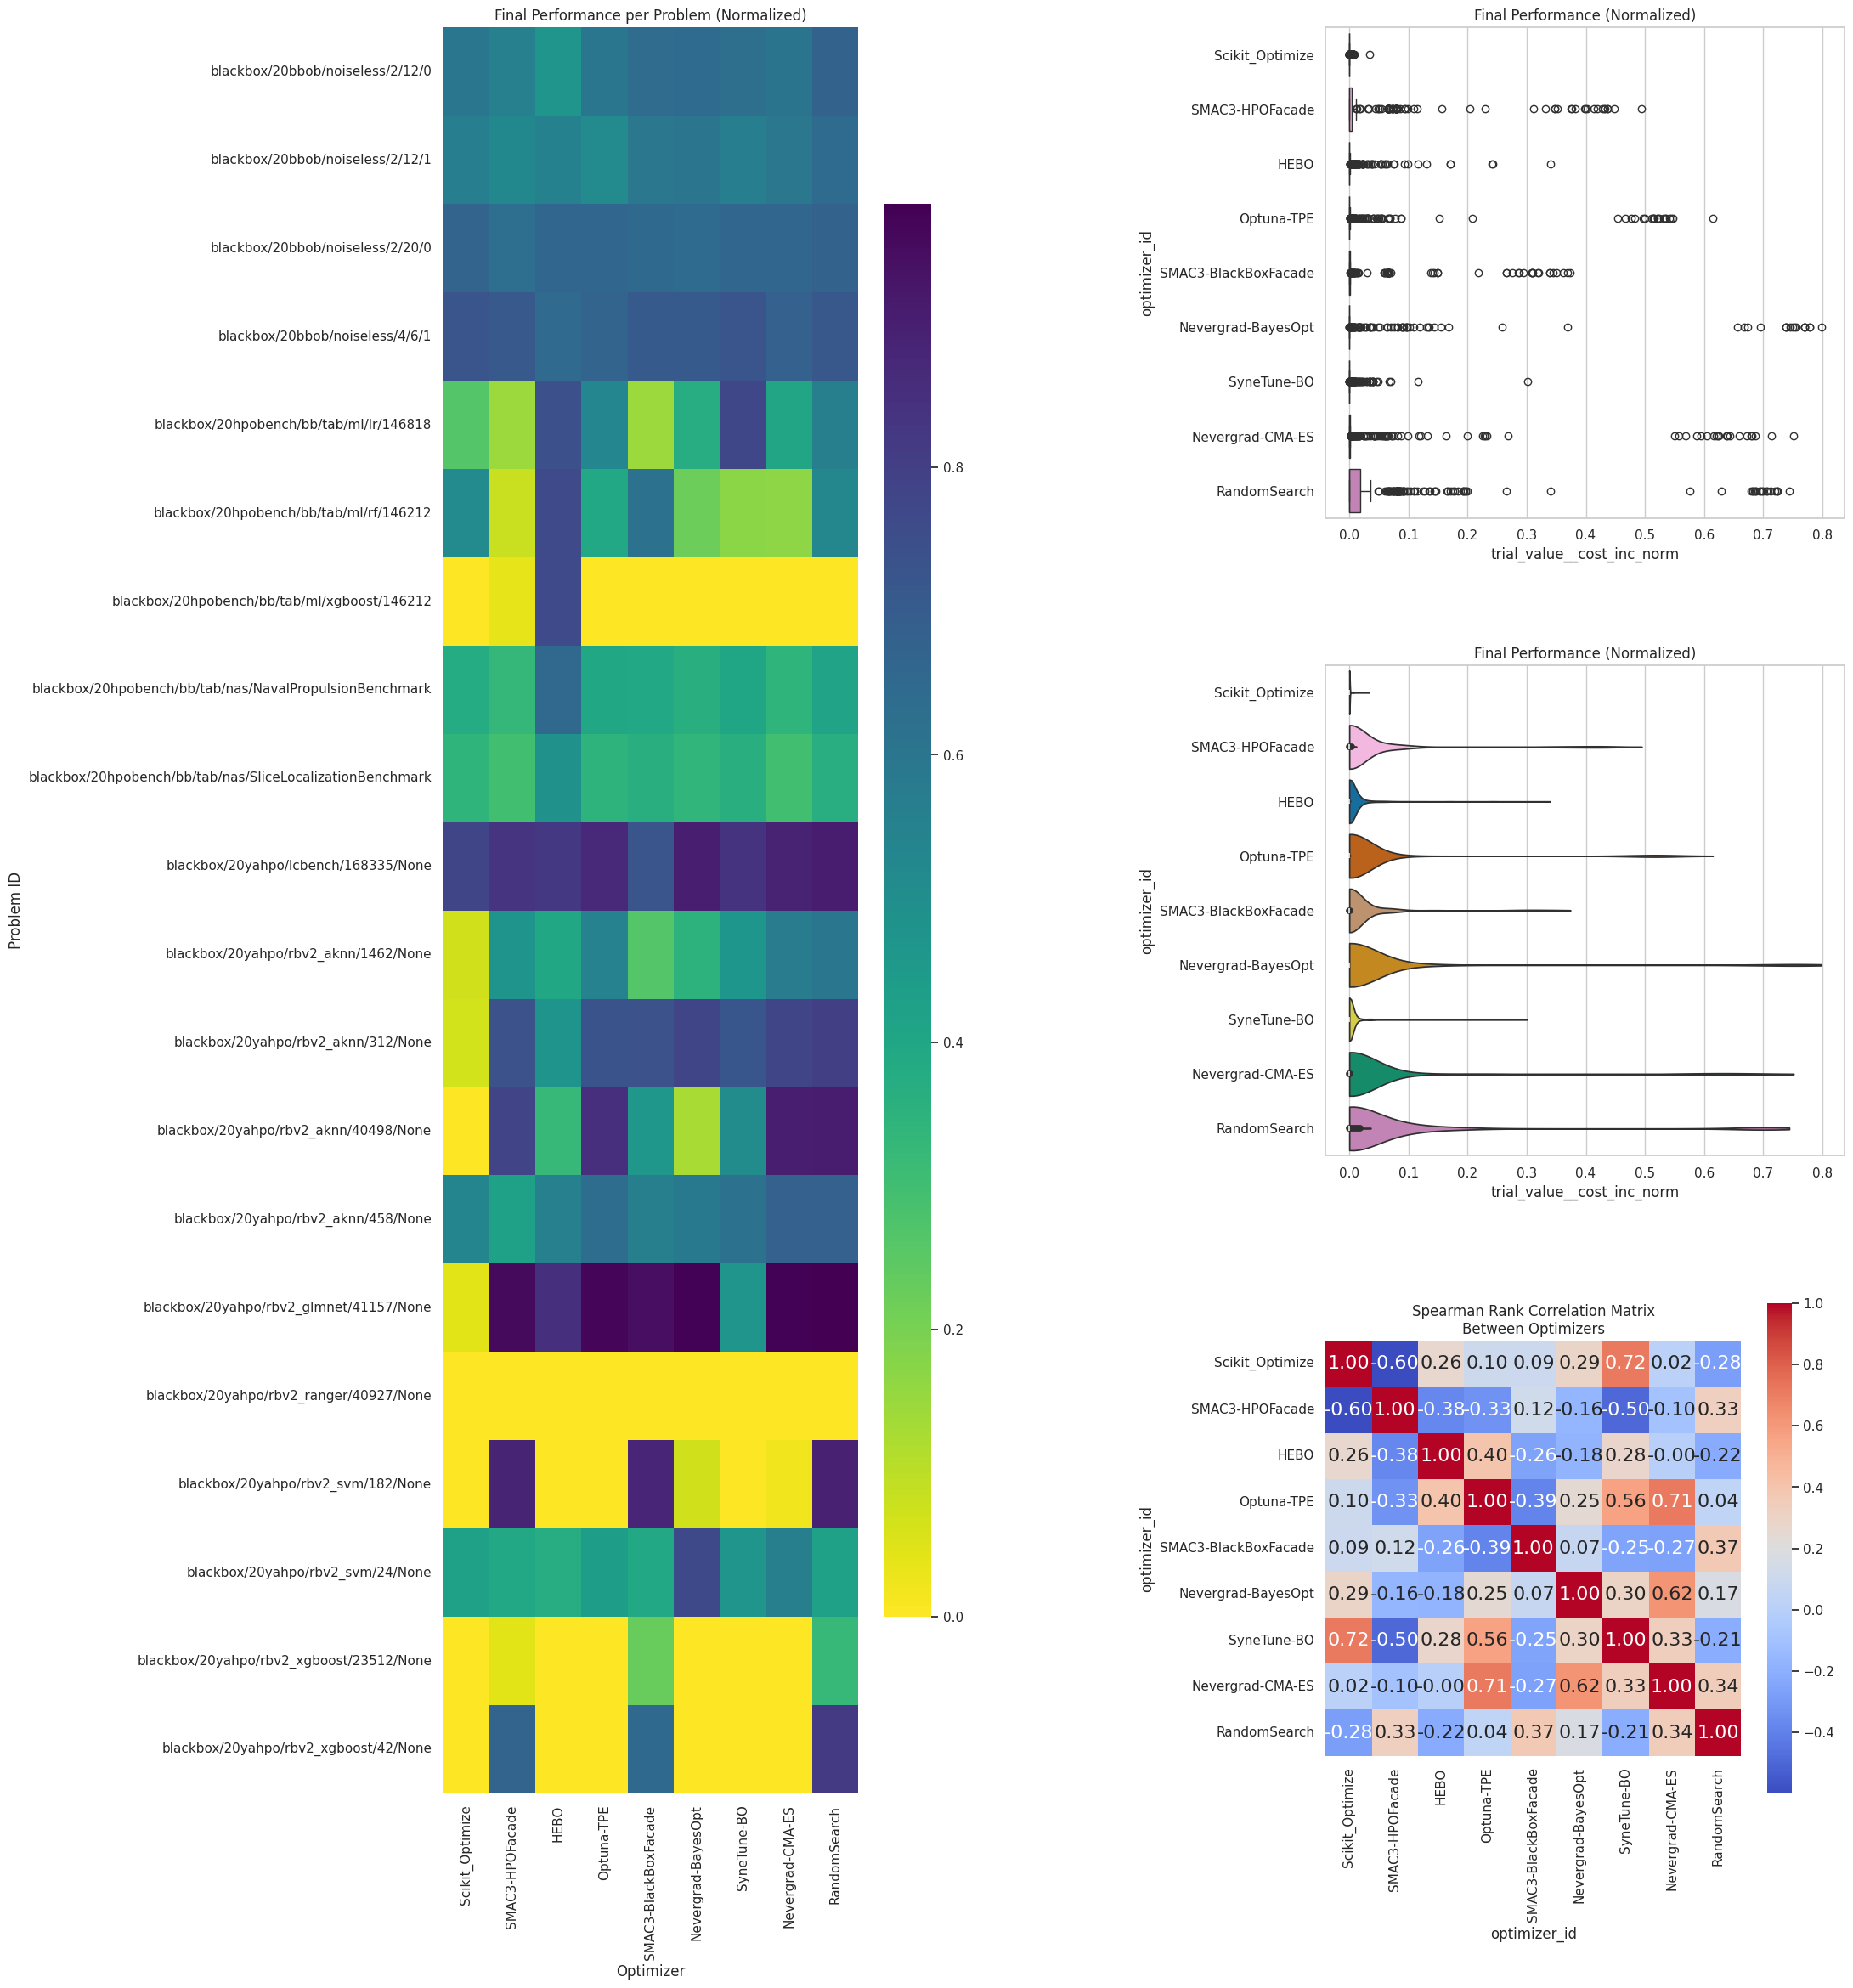

----------------------------------------------------------------------------------------------------
('blackbox', 'test')


[16:07:01] INFO     Lost following experiments: Empty DataFrame                                 ]8;id=725543;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py\run_autorank.py]8;;\:]8;id=592328;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py#113\113]8;;\
                    Columns: [HEBO, Nevergrad-BayesOpt, Nevergrad-CMA-ES, Optuna-TPE,                              
                    RandomSearch, SMAC3-BlackBoxFacade, SMAC3-HPOFacade, Scikit_Optimize,                          
                    SyneTune-BO]                                                                                   
                    Index: []                                                                                      

Fail to reject null hypothesis that data is normal for column HEBO (p=0.010330>=0.005556)
Rejecting null hypothesis that data is normal for column Nevergrad-BayesOpt (p=0.000225<0.005556)
Rejecting null hypothesis that data is normal for column Nevergrad-CMA-ES (p=0.003002<0.005556)
Rejecting null hypothesis that data is normal for column Optuna-TPE (p=0.001970<0.005556)
Rejecting null hypothesis that data is normal for column RandomSearch (p=0.000401<0.005556)
Rejecting null hypothesis that data is normal for column SMAC3-BlackBoxFacade (p=0.000630<0.005556)
Rejecting null hypothesis that data is normal for column SMAC3-HPOFacade (p=0.001005<0.005556)
Fail to reject null hypothesis that data is normal for column Scikit_Optimize (p=0.006985>=0.005556)
Rejecting null hypothesis that data is normal for column SyneTune-BO (p=0.000277<0.005556)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000001)
Using Nemenyi post

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:235: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [(rankpos(sorted_ranks[i]), cline), (rankpos(sorted_ranks[i]), chei), (textspace - 0.1, chei)],
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:243: FutureWarning: Series.__getitem__ treating ke

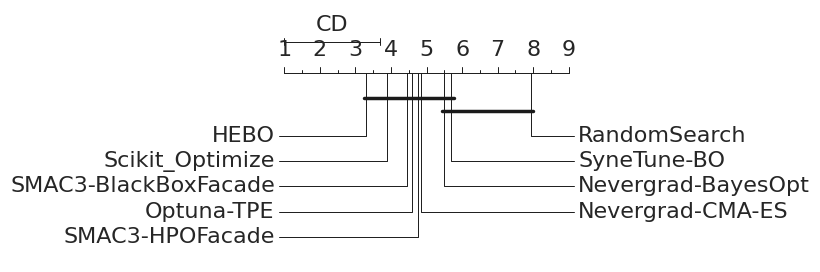

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:


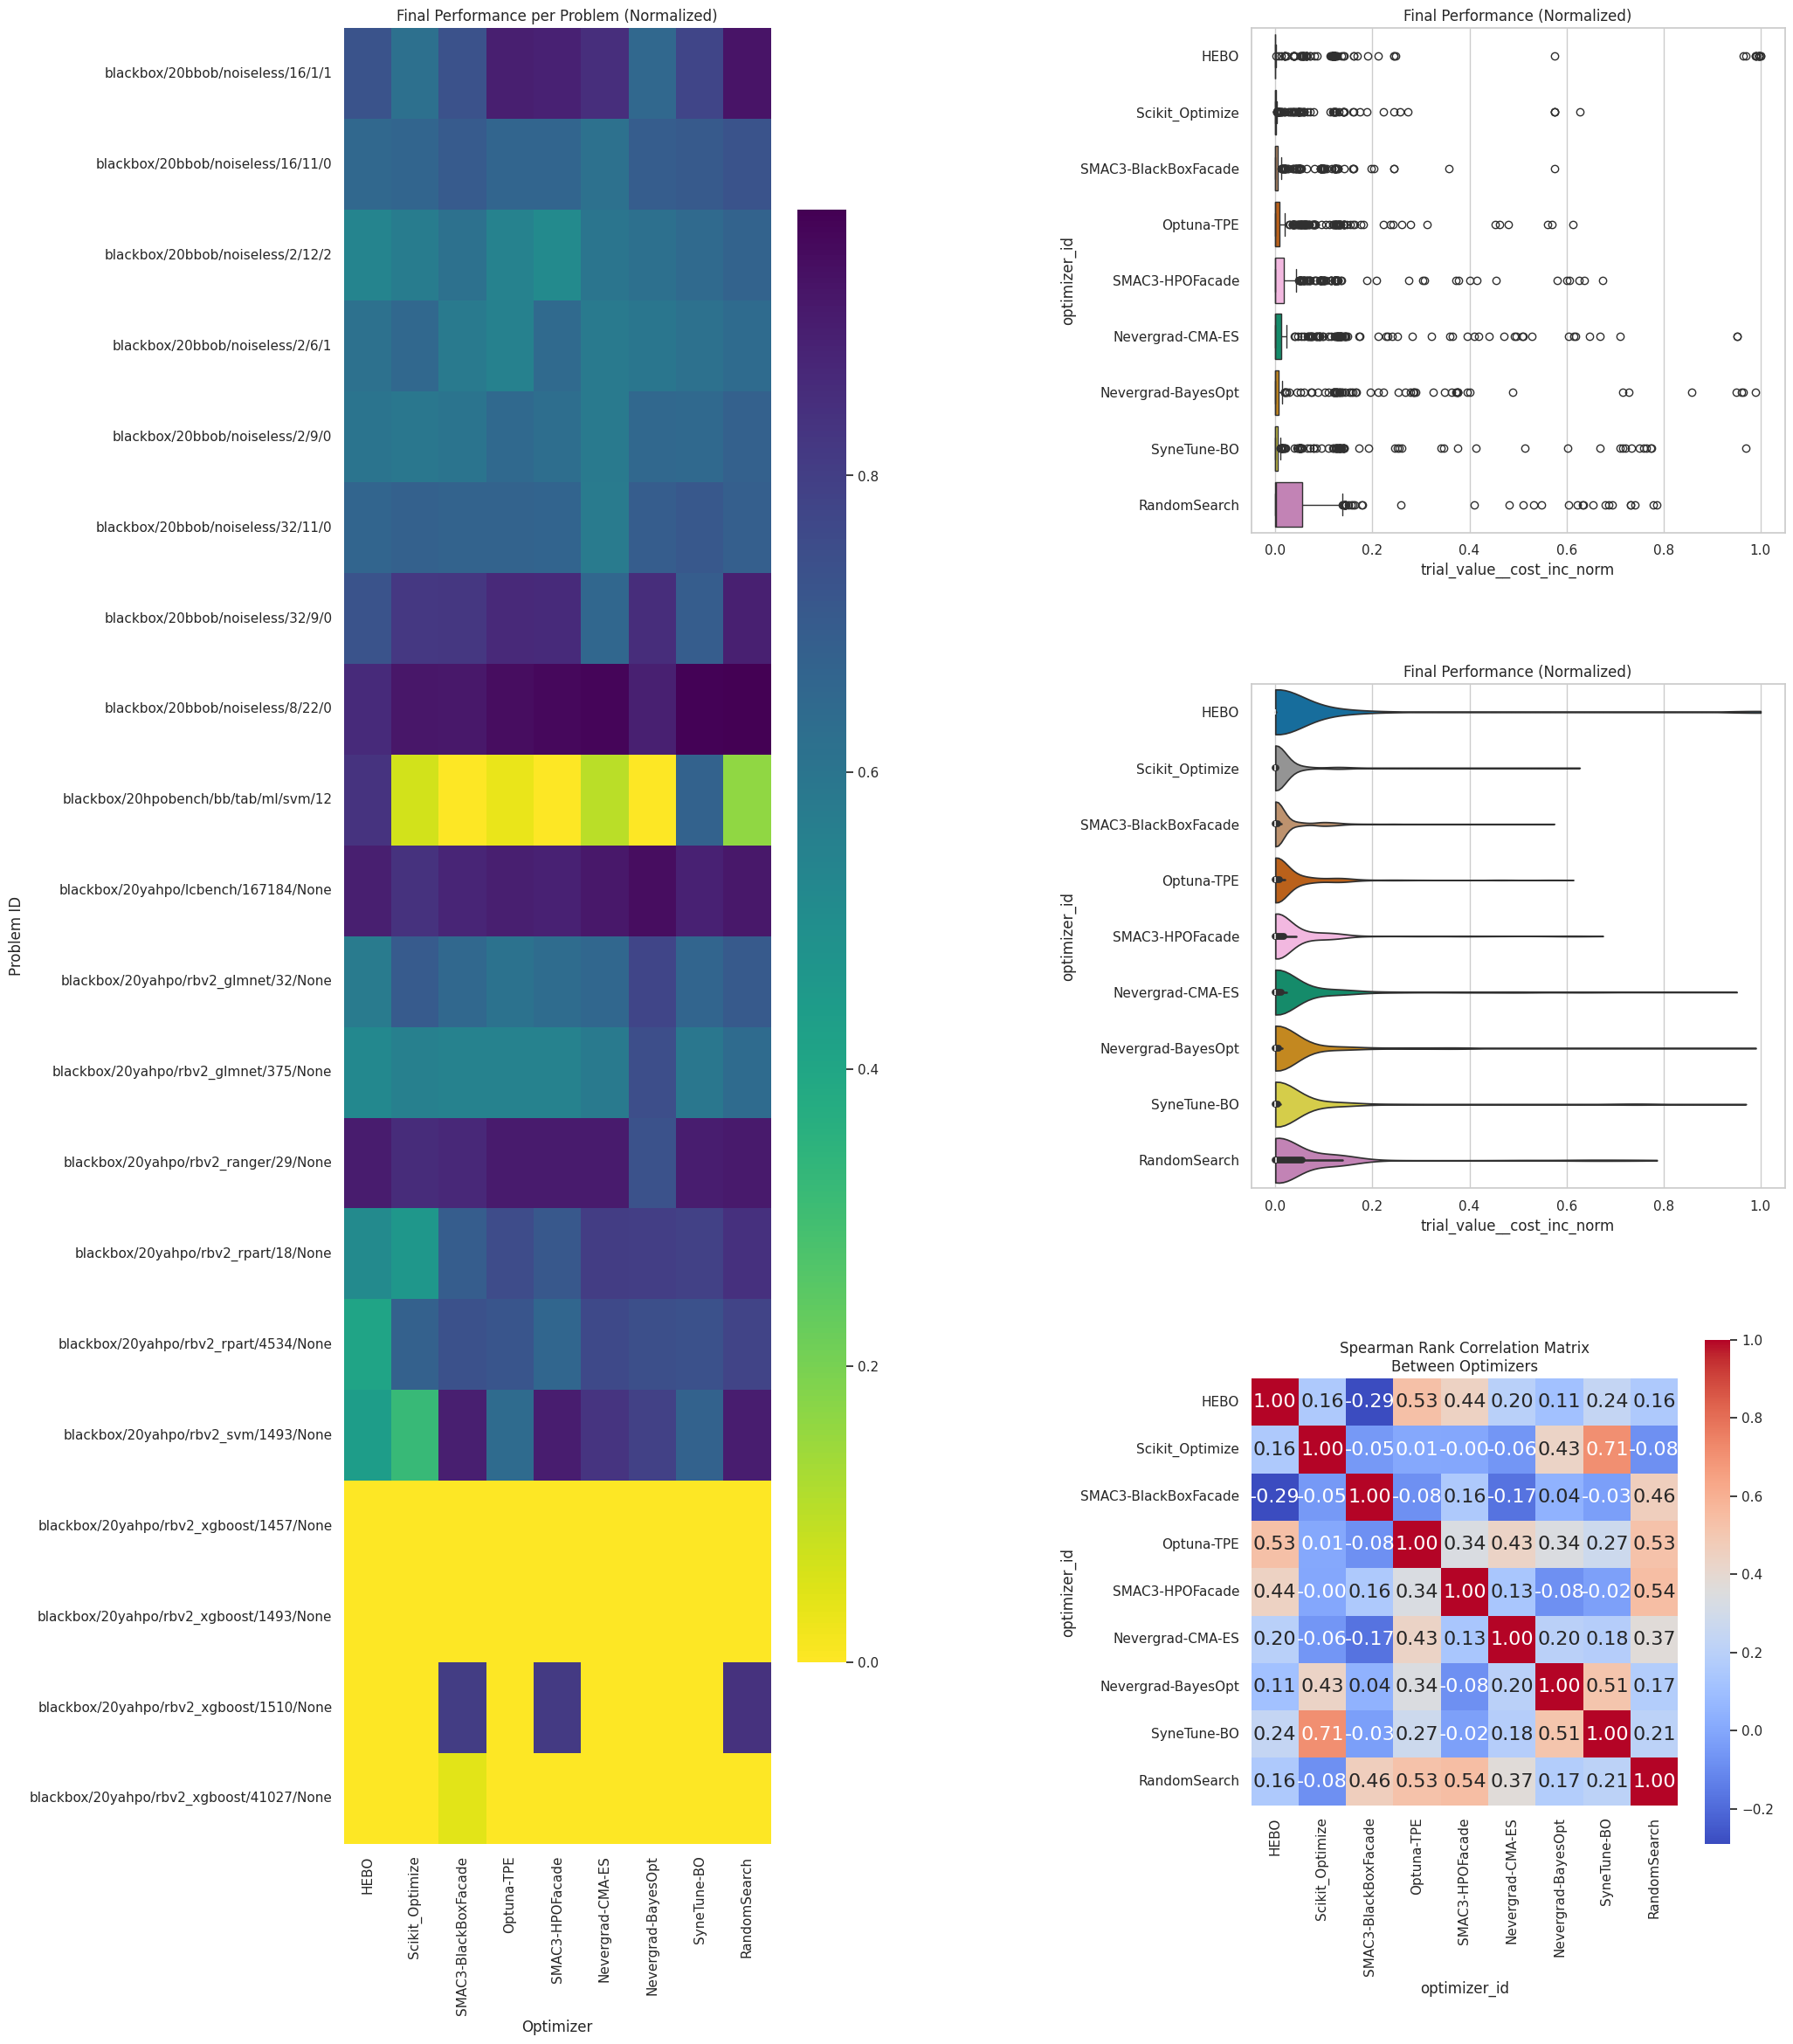

In [79]:
import importlib

import carps
import carps.analysis
import carps.analysis.plot_ranking
import matplotlib.pyplot as plt
import seaborn as sns
from carps.analysis.utils import setup_seaborn

importlib.reload(carps)
importlib.reload(carps.analysis)
importlib.reload(carps.analysis.plot_ranking)
from carps.analysis.plot_ranking import plot_ranking

setup_seaborn(font_scale=1)

rank_results = {}
for gid, gdf in df.groupby(by=["scenario", "set"]):
    print("-"*100)
    print(gid)
    scenario, set_id = gid
    perf_col = "trial_value__cost_inc_log_norm"
    if len(gdf) > 0:
        rank_result = plot_ranking(gdf=gdf, scenario=scenario, set_id=set_id, perf_col=perf_col)
        rank_results[gid] = rank_result


In [ ]:
rank_results

In [ ]:

# fig, axes = plot_interval_estimates(performance_data=perf, load_from_pickle=False, figure_filename="figures/plot_interval_estimates.pdf")

In [ ]:
import seaborn as sns
from carps.analysis.performance_over_time import get_color_palette, plot_performance_over_time, savefig, setup_seaborn

lineplot_kwargs = {"linewidth": 3}
for gid, gdf in perf.groupby(by=["scenario", "set"]):
    gid = "_".join(gid)
    print(gid)
    fig, ax = plot_performance_over_time(
        df=gdf,
        x="n_trials_norm",
        y="trial_value__cost_inc_norm",
        hue="optimizer_id",
        figure_filename=f"figures/perf_over_time/performance_over_time_{gid}_trials",
        figsize=(6,4),
        **lineplot_kwargs
    )
print("plot over time")
for gid, gdf in perf_time.groupby(by=["scenario", "set"]):
    gid = "_".join(gid)
    print(gid)
    fig, ax = plot_performance_over_time(
        df=gdf,
        x="time_norm",
        y="trial_value__cost_inc_norm",
        hue="optimizer_id",
        figure_filename=f"figures/perf_over_time/performance_over_time_{gid}_elapsed",
        figsize=(6,4),
        **lineplot_kwargs
    )

In [ ]:
# Plot per benchmark
from carps.analysis.performance_over_time import plot_performance_over_time
from carps.analysis.utils import get_color_palette, savefig

palette = get_color_palette(perf)
lineplot_kwargs = {"linewidth": 3}

for gid, gdf in perf.groupby(by=["scenario", "set", "benchmark_id"]):
    gid = "_".join(gid)
    # Iterations
    figure_filename = f"figures/perf_over_time/performance_over_time_trials_{gid}"
    fig, ax = plot_performance_over_time(df=gdf, x="n_trials_norm", y="trial_value__cost_inc_norm", hue="optimizer_id", figure_filename=figure_filename, figsize=(6,4), **lineplot_kwargs)
    ax.set_title(gid)
    savefig(fig, figure_filename)
    plt.show()

# Elapsed time
for gid, gdf in perf_time.groupby(by=["scenario", "set", "benchmark_id"]):
    gid = "_".join(gid)
    figure_filename = f"figures/perf_over_time/performance_over_time_elapsed_{gid}"
    fig, ax = plot_performance_over_time(df=gdf, x="time_norm", y="trial_value__cost_inc_norm", hue="optimizer_id", figure_filename=figure_filename, figsize=(6,4), **lineplot_kwargs)
    ax.set_title(gid)
    savefig(fig, figure_filename)
    plt.show()

In [ ]:
# Plot per problem (raw values)
from carps.analysis.performance_over_time import plot_performance_over_time
from carps.analysis.utils import get_color_palette, savefig

palette = get_color_palette(perf)
lineplot_kwargs = {"linewidth": 3}

for gid, gdf in df.groupby(by=["scenario", "set", "benchmark_id", "problem_id"]):
    gid = "_".join(gid)
    gdf = gdf[gdf["n_trials_norm"] >= 0.5]
    # Iterations
    figure_filename = f"figures/perf_over_time/performance_over_time_trials_{gid}"
    fig, ax = plot_performance_over_time(df=gdf, x="n_trials_norm", y="trial_value__cost_inc", hue="optimizer_id", figure_filename=figure_filename, figsize=(6,4), **lineplot_kwargs)
    ax.set_title(gid)
    savefig(fig, figure_filename)
    plt.show()


In [ ]:
from carps.analysis.final_performance import plot_final_performance_boxplot, plot_final_performance_violinplot
from carps.analysis.utils import filter_only_final_performance

boxplot_kwargs = {}

for gid, gdf in perf.groupby(by=["scenario", "set"]):
    print(gid)
    fig, ax = plot_final_performance_boxplot(
        df=gdf,
        x="trial_value__cost_inc_norm", y="optimizer_id", hue="optimizer_id", figure_filename=f"figures/final_perf/final_performance_boxplot_{gid}.pdf", figsize=(6,4), **boxplot_kwargs)
    fig, ax = plot_final_performance_violinplot(
        df=gdf,
        x="trial_value__cost_inc_norm", y="optimizer_id", hue="optimizer_id", figure_filename=f"figures/final_perf/final_performance_violinplot_{gid}.pdf", figsize=(6,4), **boxplot_kwargs)

In [ ]:
max_val = df["n_trials_norm"].max()
error = df.groupby(by=["benchmark_id", "problem_id", "optimizer_id", "seed"])["n_trials_norm"].apply(lambda x: not np.isclose(x.max(), max_val))
error = error[error]
for i in error.index:
    print(i)